# 第5回課題
第5回課題では，以下の項目を満たすように分析してください．

明確な解答は用意していませんが，少なくとも間違っていないと言える推論をするようにしてください．

- データの取得
- データの確認
 - 特徴量の確認
 - ラベルの確認
- 仮説を立てる
- データの分析
- モデルの訓練
- 予測
- 精度の確認
- 仮説の確認

# データの取得
wine data 以外を利用してデータ分析してください．

なるべく，ラベルと属性から推論が立てやすいデータを選択するとやりやすいです．

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
data=pd.read_csv("./archive/runs.csv")
#生涯獲得賞金、オッズ、年齢、順位に相関があると考えられる



# データの確認
データ分析以前にわかることを確認．特徴量の属性やドメイン知識など
- 特徴量の確認
- ラベルの確認

In [75]:
data.columns.values

array(['race_id', 'horse_no', 'horse_id', 'result', 'won',
       'lengths_behind', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'horse_gear', 'declared_weight', 'actual_weight',
       'draw', 'position_sec1', 'position_sec2', 'position_sec3',
       'position_sec4', 'position_sec5', 'position_sec6', 'behind_sec1',
       'behind_sec2', 'behind_sec3', 'behind_sec4', 'behind_sec5',
       'behind_sec6', 'time1', 'time2', 'time3', 'time4', 'time5',
       'time6', 'finish_time', 'win_odds', 'place_odds', 'trainer_id',
       'jockey_id'], dtype=object)

In [101]:
feature_names=data.columns.values

In [29]:
race_id - unique identifier for the race

horse_no - the number assigned to this horse, in the race

horse_id - unique identifier for this horse

result - finishing position of this horse in the race

won - whether horse won (1) or otherwise (0)

lengths_behind - finishing position, as the number of horse lengths behind the winner

horse_age - current age of this horse at the time of the race

horse_country - country of origin of this horse

horse_type - sex of the horse, e.g. 'Gelding', 'Mare', 'Horse', 'Rig', 'Colt', 'Filly'

horse_rating - rating number assigned by HKJC to this horse at the time of the race

horse_gear - string representing the gear carried by the horse in the race. An explanation of the codes used may be found on the HKJC website.

declared_weight - declared weight of the horse and jockey, in lbs

actual_weight - actual weight carried by the horse, in lbs

draw - post position number of the horse in this race

position_sec1 - position of this horse (ranking) in section 1 of the race

position_sec2 - position of this horse (ranking) in section 2 of the race

position_sec3 - position of this horse (ranking) in section 3 of the race

position_sec4 - position of this horse (ranking) in section 4 of the race, if any

position_sec5 - position of this horse (ranking) in section 5 of the race, if any

position_sec6 - position of this horse (ranking) in section 6 of the race, if any

behind_sec1 - position of this horse (lengths behind leader) in section 1 of the race

behind_sec2 - position of this horse (lengths behind leader) in section 2 of the race

behind_sec3 - position of this horse (lengths behind leader) in section 3 of the race

behind_sec4 - position of this horse (lengths behind leader) in section 4 of the race, if any

behind_sec5 - position of this horse (lengths behind leader) in section 5 of the race, if any

behind_sec6 - position of this horse (lengths behind leader) in section 6 of the race, if any

time1 - time taken by the horse to pass through the 1st section of the race (sec)

time2 - time taken by the horse to pass through the 2nd section of the race (sec)

time3 - time taken by the horse to pass through the 3rd section of the race (sec)

time4 - time taken by the horse to pass through the 4th section of the race, if any (sec)

time5 - time taken by the horse to pass through the 5th section of the race, if any (sec)

time6 - time taken by the horse to pass through the 6th section of the race, if any (sec)

finish_time - finishing time of the horse in this race (sec)

win_odds - win odds for this horse at start of race

place_odds - place (finishing in 1st, 2nd or 3rd position) odds for this horse at start of race

trainer_id - unique identifier of the horse's trainer at the time of the race

jockey_id - unique identifier of the jockey riding the horse in this race

SyntaxError: invalid syntax (<ipython-input-29-545b2ad3ffb9>, line 1)

In [ ]:
race_id - レースの一意の識別子です。

horse_no - レース中にこの馬に割り当てられた番号です。

horse_id - この馬の固有の識別子です。

result - レース中のこの馬の順位です。

won - 馬が勝ったか（1）、そうでないか（0）を示します。

lengths_behind - 勝者から何馬身遅れているかを示す順位です。

horse_age - レースの時点でのこの馬の年齢。

horse_country - この馬の出身国です。

horse_type - 馬の性別、例：「Gelding」、「Mare」、「Horse」、「Rig」、「Colt」、「Filly

horse_rating - レースの際にHKJCがこの馬に割り当てたレーティング番号

horse_gear - レース中に馬が持っていたギアを表す文字列。使用されるコードの説明は、HKJCのウェブサイトに掲載されています。

declared_weight - 宣言された馬と騎手の体重（単位：ポンド

actual_weight - 馬が実際に運んだ重量、単位：ポンド

draw - このレースの馬のポストポジション番号

position_sec1 - レースのセクション1におけるこの馬の位置（順位）。

position_sec2 - レース中のセクション2におけるこの馬の位置（順位）。

position_sec3 - レースの第3区間でのこの馬の位置（順位）。

position_sec4 - レースの第4区間でのこの馬の位置（順位）、もしあれば

position_sec5 - レースの第5節でのこの馬の位置（順位）、もしあれば

position_sec6 - レースの第6節でのこの馬の位置（順位）、もしあれば

behind_sec1 - レースの第1区間でのこの馬の位置（先頭からの距離）。

behind_sec2 - レースの第2区間でのこの馬の位置（先頭からの距離）。

behind_sec3 - レースの第3区間でのこの馬の位置（先頭からの距離）。

behind_sec4 - レースの第4区間でのこの馬の位置（先頭からの距離）、もしあれば

behind_sec5 - レースの第5区間でのこの馬の位置（先頭からの距離）、もしあれば

behind_sec6 - レースの第6区間でのこの馬の位置（先頭からの距離）、もしあれば

time1 - この馬がレースの第1区間を通過するのにかかった時間(秒)

time2 - この馬がレースの第2区間を通過するのに要した時間(秒)

time3 - レースの第3区間を馬が通過するのに要した時間(秒)

time4 - 第4区間がある場合、馬がそれを通過するのに要した時間(秒)

time5 - レースの第5区間を通過するために馬が要した時間（秒）（もしあれば

time6 - レースの第6区間を通過するために馬が要した時間(秒)

finish_time - このレースでの馬のゴールタイム（秒）。

win_odds - レース開始時のこの馬の勝利オッズ

place_odds - レース開始時のこの馬の着順（1位、2位、3位）のオッズ。

trainer_id - レース時の馬の調教師のユニークな識別子。

jockey_id - このレースで馬に乗っているジョッキーのユニークな識別子。

www.DeepL.com/Translator（無料版）で翻訳しました。

# 仮説を立てる
データについて，導きたい仮説と結論を整理してください．

In [30]:
オッズ、騎手、馬の体重、年齢などレース前からわかる数値が実際の順位に相関があると仮定。

SyntaxError: invalid character in identifier (<ipython-input-30-dc996c096e15>, line 1)

# データの分析

In [102]:
data_df = pd.DataFrame(data, columns=feature_names)
data_df.columns

Index(['race_id', 'horse_no', 'horse_id', 'result', 'won', 'lengths_behind',
       'horse_age', 'horse_country', 'horse_type', 'horse_rating',
       'horse_gear', 'declared_weight', 'actual_weight', 'draw',
       'position_sec1', 'position_sec2', 'position_sec3', 'position_sec4',
       'position_sec5', 'position_sec6', 'behind_sec1', 'behind_sec2',
       'behind_sec3', 'behind_sec4', 'behind_sec5', 'behind_sec6', 'time1',
       'time2', 'time3', 'time4', 'time5', 'time6', 'finish_time', 'win_odds',
       'place_odds', 'trainer_id', 'jockey_id'],
      dtype='object')

In [103]:
data_df["result"]

0        10
1         8
2         7
3         9
4         6
         ..
79442     6
79443     7
79444    10
79445     8
79446    11
Name: result, Length: 79447, dtype: int64

In [104]:
data_df.describe()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_rating,declared_weight,actual_weight,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
count,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,...,79447.000000,79447.000000,46226.000000,10079.000000,1296.000000,79447.000000,79447.000000,75712.000000,79447.000000,79447.000000
mean,3173.352814,6.905623,2204.410525,6.838597,0.080053,6.108901,3.339346,61.034904,1104.953568,122.729656,...,22.928985,23.864054,24.039662,24.105221,24.350216,85.322914,28.812977,7.423177,79.793007,85.832341
std,1833.101494,3.760711,1275.049375,3.730498,0.271378,33.636209,0.876763,11.748788,62.347597,6.305496,...,3.599727,3.571163,4.663367,1.127963,1.314755,18.512883,30.097375,8.823430,45.118874,54.338105
min,0.000000,1.000000,0.000000,1.000000,0.000000,-0.500000,2.000000,10.000000,693.000000,103.000000,...,19.990000,21.000000,21.200000,21.420000,21.500000,55.160000,1.000000,1.000000,0.000000,0.000000
25%,1586.000000,4.000000,1085.000000,4.000000,0.000000,1.750000,3.000000,60.000000,1062.000000,118.000000,...,22.290000,23.230000,23.320000,23.410000,23.570000,70.590000,7.700000,2.400000,47.000000,39.000000
50%,3174.000000,7.000000,2209.000000,7.000000,0.000000,4.000000,3.000000,60.000000,1102.000000,123.000000,...,22.870000,23.760000,23.890000,23.960000,24.120000,83.350000,15.000000,4.100000,75.000000,76.000000
75%,4764.500000,10.000000,3308.000000,10.000000,0.000000,6.750000,3.000000,60.000000,1146.000000,128.000000,...,23.520000,24.410000,24.560000,24.630000,24.820000,100.780000,38.000000,8.600000,118.000000,138.000000
max,6348.000000,14.000000,4404.000000,14.000000,1.000000,999.000000,10.000000,138.000000,1369.000000,133.000000,...,999.000000,999.000000,999.000000,49.570000,34.150000,163.580000,99.000000,101.000000,175.000000,185.000000


In [105]:
data_df.values
#使わないデータはすべて除外
data_df=data_df.drop(['race_id',  'horse_id', 'won',
       'lengths_behind', 'horse_country', 'horse_type',
        'horse_gear', 'position_sec1', 'position_sec2', 'position_sec3',
       'position_sec4', 'position_sec5', 'position_sec6', 'behind_sec1',
       'behind_sec2', 'behind_sec3', 'behind_sec4', 'behind_sec5',
       'behind_sec6', 'time1', 'time2', 'time3', 'time4', 'time5',
       'time6', 'finish_time', 'trainer_id',
       'jockey_id'],axis=1)

In [106]:
data_df

,horse_no,result,horse_age,horse_rating,declared_weight,actual_weight,draw,win_odds,place_odds
0,1,10,3,60,1020.0,133,7,9.7,3.7
1,2,8,3,60,980.0,133,12,16.0,4.9
2,3,7,3,60,1082.0,132,8,3.5,1.5
3,4,9,3,60,1118.0,127,13,39.0,11.0
4,5,6,3,60,972.0,131,14,50.0,14.0
...,...,...,...,...,...,...,...,...,...
79442,10,6,5,87,1191.0,122,6,99.0,NaN
79443,11,7,5,84,1070.0,119,4,99.0,NaN
79444,12,10,5,83,1148.0,120,1,99.0,NaN
79445,13,8,3,82,1266.0,119,12,4.6,NaN


In [107]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
result=data_df['result']
data_df=data_df.drop('result',axis=1)
data_df = pd.DataFrame(min_max_scaler.fit_transform(data_df.values), columns=data_df.columns.values)
data_df = pd.concat([data_df, pd.DataFrame(result, columns=["result"])], axis=1)
data_df.head()

,horse_no,horse_age,horse_rating,declared_weight,actual_weight,draw,win_odds,place_odds,result
0,0.000000,0.125,0.390625,0.483728,1.000000,0.428571,0.088776,0.027,10
1,0.076923,0.125,0.390625,0.424556,1.000000,0.785714,0.153061,0.039,8
2,0.153846,0.125,0.390625,0.575444,0.966667,0.500000,0.025510,0.005,7
3,0.230769,0.125,0.390625,0.628698,0.800000,0.857143,0.387755,0.100,9
4,0.307692,0.125,0.390625,0.412722,0.933333,0.928571,0.500000,0.130,6


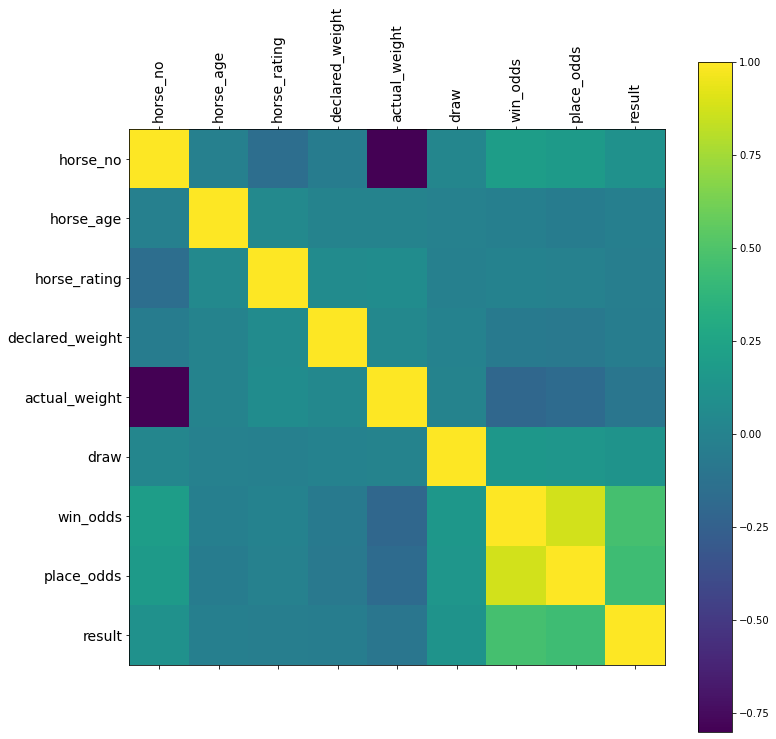

In [108]:
fig = plt.figure(figsize=(12, 12))
plt.matshow(data_df.corr("pearson"), fignum=fig.number)
plt.xticks(range(data_df.shape[1]), data_df.columns, fontsize=14, rotation=90)
plt.yticks(range(data_df.shape[1]), data_df.columns, fontsize=14)
plt.colorbar()

# モデルの訓練
データは分割するようにしてください．交叉検証についてはまだ説明したいので自由にしてください．

また，モデルの訓練およびデータ分割時に乱数の指定がないなど再現性がなさそうなコードは認めないことにします．

モデルは自由ですが，sklearn を想定しています．自作ライブラリも可ですが，自作の場合，該当箇所は適当に読みます．

In [110]:
corr = data_df.corr().values
[[data_df.columns[i], data_df.columns[j], corr[i][j]] for i in range(data_df.shape[1]-1) for j in range(data_df.shape[1]-1) if abs(corr[i][j]) >= 0.15 and corr[i][j] != 1]

[['horse_no', 'actual_weight', -0.8002512951940169],
 ['horse_no', 'win_odds', 0.20063883524624793],
 ['horse_no', 'place_odds', 0.1831374333635721],
 ['actual_weight', 'horse_no', -0.8002512951940169],
 ['actual_weight', 'win_odds', -0.20086159536770137],
 ['actual_weight', 'place_odds', -0.17343803487803935],
 ['draw', 'win_odds', 0.15478165561864637],
 ['win_odds', 'horse_no', 0.20063883524624793],
 ['win_odds', 'actual_weight', -0.20086159536770137],
 ['win_odds', 'draw', 0.15478165561864637],
 ['win_odds', 'place_odds', 0.8803013740830838],
 ['place_odds', 'horse_no', 0.1831374333635721],
 ['place_odds', 'actual_weight', -0.17343803487803935],
 ['place_odds', 'win_odds', 0.8803013740830838]]

In [111]:
data_df_dummy = pd.concat([data_df, pd.get_dummies(data_df["result"], prefix="result_")], axis=1)
data_df_dummy.head()

,horse_no,horse_age,horse_rating,declared_weight,actual_weight,draw,win_odds,place_odds,result,result__1,...,result__5,result__6,result__7,result__8,result__9,result__10,result__11,result__12,result__13,result__14
0,0.000000,0.125,0.390625,0.483728,1.000000,0.428571,0.088776,0.027,10,0,...,0,0,0,0,0,1,0,0,0,0
1,0.076923,0.125,0.390625,0.424556,1.000000,0.785714,0.153061,0.039,8,0,...,0,0,0,1,0,0,0,0,0,0
2,0.153846,0.125,0.390625,0.575444,0.966667,0.500000,0.025510,0.005,7,0,...,0,0,1,0,0,0,0,0,0,0
3,0.230769,0.125,0.390625,0.628698,0.800000,0.857143,0.387755,0.100,9,0,...,0,0,0,0,1,0,0,0,0,0
4,0.307692,0.125,0.390625,0.412722,0.933333,0.928571,0.500000,0.130,6,0,...,0,1,0,0,0,0,0,0,0,0


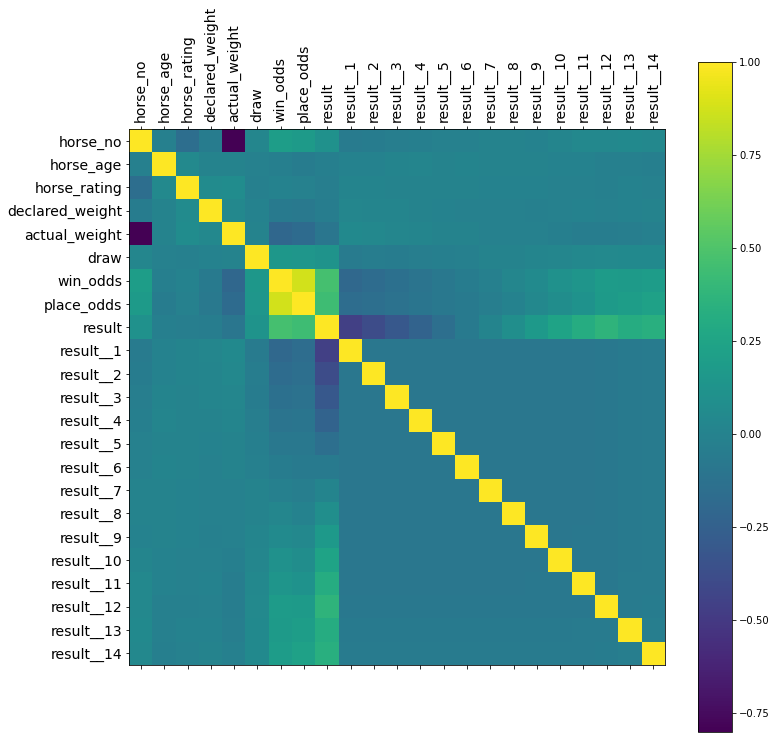

In [113]:
fig = plt.figure(figsize=(12, 12))
plt.matshow(data_df_dummy.corr("pearson"), fignum=fig.number)
plt.xticks(range(data_df_dummy.shape[1]), data_df_dummy.columns, fontsize=14, rotation=90)
plt.yticks(range(data_df_dummy.shape[1]), data_df_dummy.columns, fontsize=14)
plt.colorbar()

In [114]:
corr = data_df_dummy.corr().values
[[data_df_dummy.columns[i], data_df_dummy.columns[j], corr[i][j]] for i in range(data_df_dummy.shape[1]-1) for j in range(data_df_dummy.shape[1]-1) if abs(corr[i][j]) >= 0.15 and corr[i][j] != 1]

[['horse_no', 'actual_weight', -0.8002512951940169],
 ['horse_no', 'win_odds', 0.20063883524624793],
 ['horse_no', 'place_odds', 0.1831374333635721],
 ['actual_weight', 'horse_no', -0.8002512951940169],
 ['actual_weight', 'win_odds', -0.20086159536770137],
 ['actual_weight', 'place_odds', -0.17343803487803935],
 ['draw', 'win_odds', 0.15478165561864637],
 ['win_odds', 'horse_no', 0.20063883524624793],
 ['win_odds', 'actual_weight', -0.20086159536770137],
 ['win_odds', 'draw', 0.15478165561864637],
 ['win_odds', 'place_odds', 0.8803013740830838],
 ['win_odds', 'result', 0.47056227994397554],
 ['win_odds', 'result__1', -0.19079005239979446],
 ['win_odds', 'result__2', -0.16477566807681235],
 ['win_odds', 'result__12', 0.18617145974629373],
 ['win_odds', 'result__13', 0.18120304338234844],
 ['place_odds', 'horse_no', 0.1831374333635721],
 ['place_odds', 'actual_weight', -0.17343803487803935],
 ['place_odds', 'win_odds', 0.8803013740830838],
 ['place_odds', 'result', 0.4399043027141292],
 

In [115]:
def correlation_ratio(X, Y):
    c = 0
    for i in range(np.min(Y), np.max(Y)+1):
        x = X[Y == i]
        c += np.var(x)*len(x)
    return 1-c/(np.var(X)*len(X))

In [117]:
[[data_df.columns[i], "result", correlation_ratio(data_df[data_df.columns[i]], data_df["result"])] for i in range(data_df.shape[1]-1)]

[['horse_no', 'result', 0.013447676744946624],
 ['horse_age', 'result', 0.001700799796514496],
 ['horse_rating', 'result', 0.0009196255380485852],
 ['declared_weight', 'result', 0.002165698611272693],
 ['actual_weight', 'result', 0.009423341745313674],
 ['draw', 'result', 0.016534626361605298],
 ['win_odds', 'result', 0.22661859993713118],
 ['place_odds', 'result', 0.21377890998652338]]

# 予測

In [123]:
#回帰分析
from sklearn import linear_model

In [124]:
clf = linear_model.LinearRegression()
X = data_df["win_odds"].values.reshape(-1, 1)
Y = data_df["result"]
clf.fit(X, Y)

LinearRegression()

In [125]:
# 傾き，切片，相関係数の2乗
clf.coef_, clf.intercept_, clf.score(X, Y) 

(array([5.71585707]), 5.216402897385594, 0.22142885930612932)

Text(0, 0.5, 'result')

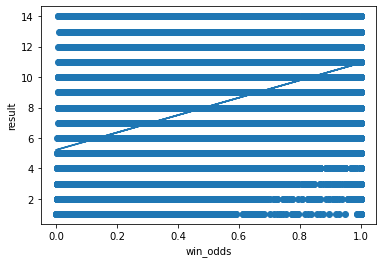

In [126]:
plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("win_odds")
plt.ylabel("result")
#点が多すぎて見にくいが、近似曲線により、馬の倍率が最小でも期待順位は5ほどとなっている

# 精度の確認

In [142]:
#NANに平均値を代入
data_df=data_df.fillna(data_df.median())

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(data_df[data_df.columns.values], data_df["result"], test_size=0.33, random_state=1)

In [145]:
X_train.shape, X_test.shape

((53229, 9), (26218, 9))

# 仮説の確認
最初に立てた仮説を確認してください．

予測傾向など精度ベースでも仮説を確認することはできますが，決定木や可視化を用いる方が楽かもしれません．

In [146]:
#SVC
from sklearn.svm import SVC

In [147]:
# 訓練
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

SVC(random_state=0)

In [148]:
# 予測
pred = clf.predict(X_test)
pred

array([11,  2,  5, ...,  2,  2,  8], dtype=int64)

In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [151]:
# 評価
# accuracy　正答率, precision　適合率, recall　再現率, f値
accuracy_score(pred, y_test), precision_score(pred, y_test, average=None), \
recall_score(pred, y_test, average=None), f1_score(pred, y_test, average=None)
#なぜか1しか出力されない

(1.0,
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [153]:
from sklearn import tree

In [154]:
#訓練
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [155]:
#予測
pred = clf.predict(X_test)

In [156]:
# 評価
# accuracy　正答率, precision　適合率, recall　再現率, f値
accuracy_score(pred, y_test), precision_score(pred, y_test, average=None), \
recall_score(pred, y_test, average=None), f1_score(pred, y_test, average=None)
#なぜか1しか出力されない

(1.0,
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

[Text(297.59999999999997, 440.31600000000003, 'result <= 1.5\ngini = 0.925\nsamples = 53229\nvalue = [4247, 4176, 4264, 4273, 4273, 4245, 4295, 4258, 4107\n4118, 3840, 3661, 1875, 1597]\nclass = 7'),
 Text(198.39999999999998, 342.468, 'gini = 0.0\nsamples = 4247\nvalue = [4247, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]\nclass = 1'),
 Text(396.79999999999995, 342.468, 'result <= 3.5\ngini = 0.919\nsamples = 48982\nvalue = [0, 4176, 4264, 4273, 4273, 4245, 4295, 4258, 4107\n4118, 3840, 3661, 1875, 1597]\nclass = 7'),
 Text(198.39999999999998, 244.62, 'result <= 2.5\ngini = 0.5\nsamples = 8440\nvalue = [0, 4176, 4264, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0]\nclass = 3'),
 Text(99.19999999999999, 146.772, 'gini = 0.0\nsamples = 4176\nvalue = [0, 4176, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]\nclass = 2'),
 Text(297.59999999999997, 146.772, 'gini = 0.0\nsamples = 4264\nvalue = [0, 0, 4264, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]\nclass = 3'),
 Text(595.1999999999999, 244.62, 'result <= 4.5\ngini = 0.903\nsamples

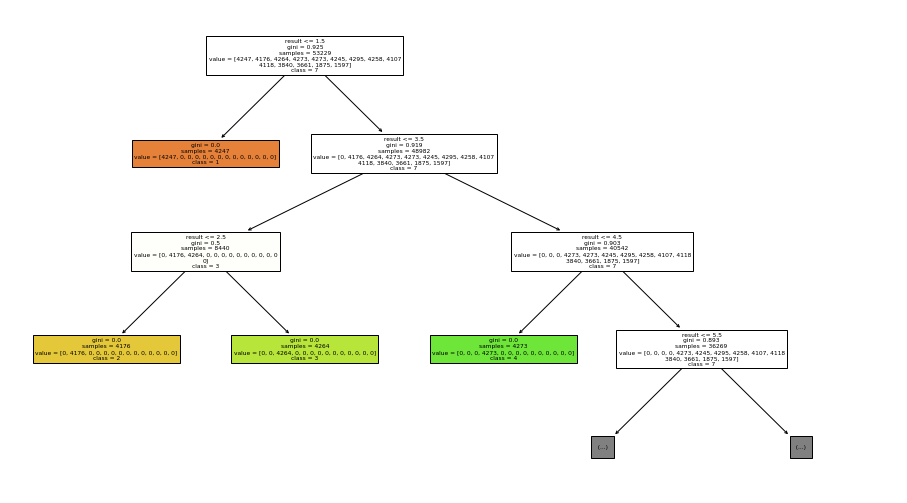

In [162]:
# 可視化
plt.figure(figsize=(16, 9))
tree.plot_tree(clf, feature_names=data_df.columns.values, class_names=["1", "2", "3","4", "5", "6","7", "8", "9","10"],
               filled=True, max_depth=3) 

In [ ]:

#まだ未完成です。